In [11]:
import pickle
import numpy as np
import pandas as pd
import os

# Data import #

In [12]:
dir = os.getcwd()

In [13]:
with open(dir+"\\..\\data\\outputs\\X.pkl","rb") as f:
    X = pickle.load(f)

with open(dir+"\\..\\data\\outputs\\y.pkl","rb") as f:
    y_series = pickle.load(f)

In [14]:
#X丢弃Date
X = X.drop(['Date'],axis=1)
#y_series变成DataFrame
y = pd.DataFrame(y_series)


In [15]:
#分割数据集
tarin_percentage, dev_percentage, test_percentage = 0.8, 0.1, 0.1
X_train, X_dev, X_test = X.iloc[:int(len(X)*tarin_percentage)], X.iloc[int(len(X)*tarin_percentage):int(len(X)*(tarin_percentage+dev_percentage))], X.iloc[int(len(X)*(tarin_percentage+dev_percentage)):]
y_train, y_dev, y_test = y.iloc[:int(len(y)*tarin_percentage)], y.iloc[int(len(y)*tarin_percentage):int(len(y)*(tarin_percentage+dev_percentage))], y.iloc[int(len(y)*(tarin_percentage+dev_percentage)):]


In [16]:
X_train

,neutral,positive,negative,vader_score,comment_num,Open,High,Low,Close,Volume,Close_EWMA3,Close_EWMA7,Close_EWMA14,Close_EWMA30,Close
0,0.702078,0.153399,0.144523,0.103267,867,27.847500,27.860001,26.837500,27.332500,212818400.0,27.332500,27.332500,27.332500,27.332500,26.562500
1,0.722395,0.138788,0.138817,0.146491,1147,27.072500,27.162500,26.352501,26.562500,257142000.0,26.947500,27.140000,27.229833,27.282823,26.565001
2,0.697031,0.187037,0.115931,0.193284,1190,26.635000,26.857500,26.157499,26.565001,263188400.0,26.756251,26.996250,27.141189,27.236512,26.937500
3,0.711032,0.173487,0.115481,0.141675,1094,26.799999,27.049999,26.674999,26.937500,160423600.0,26.846875,26.981563,27.114030,27.217220,27.972500
4,0.682993,0.213791,0.103216,0.168840,1495,27.307501,28.037500,27.174999,27.972500,237458000.0,27.409688,27.229297,27.228493,27.265948,28.002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.786478,0.131525,0.081997,0.237306,677,43.407501,43.542500,43.115002,43.492500,160677200.0,43.248714,43.028057,42.903808,42.544272,44.105000
743,0.811721,0.121732,0.066547,0.310279,329,43.720001,44.299999,43.715000,44.105000,117684400.0,43.676857,43.297293,43.063967,42.644964,43.634998
744,0.741413,0.150416,0.108170,0.230621,850,43.757500,43.847500,43.522499,43.634998,109745600.0,43.655927,43.381719,43.140104,42.708837,43.587502
745,0.742552,0.128190,0.129258,0.263748,649,43.717499,43.855000,43.312500,43.587502,93902400.0,43.621715,43.433165,43.199757,42.765525,43.752499


In [17]:
features_finbert = ['Open', 'High', 'Low', 'Close','neutral', 'positive', 'negative', 'Volume', 'Close_EWMA3', 'Close_EWMA7', 'Close_EWMA14', 'Close_EWMA30']
X_finbert_train = X_train[features_finbert]

X_finbert_dev = X_dev[features_finbert]

X_finbert_test = X_test[features_finbert]

In [18]:
pickle.dump(X_finbert_dev["Open"], open(dir+"\\..\\data\\outputs\\X_finbert_dev.pkl", "wb"))

In [19]:
from sklearn.preprocessing import StandardScaler



sc_X = StandardScaler()
sc_X.fit(X_finbert_train)
X_finbert_train = sc_X.transform(X_finbert_train)
X_finbert_dev = sc_X.transform(X_finbert_dev)
X_finbert_test = sc_X.transform(X_finbert_test)





scaler_y = StandardScaler()
sc_y = scaler_y.fit(y_train)
y_train = sc_y.transform(y_train)
y_dev = sc_y.transform(y_dev)
y_test = sc_y.transform(y_test)
y_test_raw = sc_y.inverse_transform(y_test)



pickle.dump(sc_X,open(dir+"\\..\\data\\outputs\\sc_X.pkl","wb"))
pickle.dump(sc_y,open(dir+"\\..\\data\\outputs\\sc_y.pkl","wb"))
pickle.dump(X_finbert_train,open(dir+"\\..\\data\\outputs\\X_train.pkl","wb"))
pickle.dump(X_finbert_dev,open(dir+"\\..\\data\\outputs\\X_dev.pkl","wb"))
pickle.dump(X_finbert_test,open(dir+"\\..\\data\\outputs\\X_test.pkl","wb"))
pickle.dump(y_train,open(dir+"\\..\\data\\outputs\\y_train.pkl","wb"))
pickle.dump(y_dev,open(dir+"\\..\\data\\outputs\\y_dev.pkl","wb"))
pickle.dump(y_test,open(dir+"\\..\\data\\outputs\\y_test.pkl","wb"))
pickle.dump(y_test_raw,open(dir+"\\..\\data\\outputs\\y_test_raw.pkl","wb"))





In [21]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.callbacks import EarlyStopping
from keras.layers import *

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score



# LSTM Model #

In [13]:
def train_model_lstm(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(LSTM(250, 
                          activation='tanh',
                          input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(200, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(150, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history

In [14]:
adam_LSTM = keras.optimizers.Adam(learning_rate=0.0001)
finbert_LSTM_model, finbert_LSTM_history = train_model_lstm(X_finbert_train, y_train,'mse', adam_LSTM, 60, 128)



Epoch 1/60
6/6 [==============================] - 8s 406ms/step - loss: 0.6563 - val_loss: 3.0987
Epoch 2/60
6/6 [==============================] - 1s 127ms/step - loss: 0.5748 - val_loss: 2.7015
Epoch 3/60
6/6 [==============================] - 1s 114ms/step - loss: 0.4845 - val_loss: 2.2097
Epoch 4/60
6/6 [==============================] - 1s 115ms/step - loss: 0.3731 - val_loss: 1.5969
Epoch 5/60
6/6 [==============================] - 1s 131ms/step - loss: 0.2379 - val_loss: 0.8861
Epoch 6/60
6/6 [==============================] - 1s 134ms/step - loss: 0.0973 - val_loss: 0.2476
Epoch 7/60
6/6 [==============================] - 1s 122ms/step - loss: 0.0167 - val_loss: 0.0097
Epoch 8/60
6/6 [==============================] - 1s 119ms/step - loss: 0.0274 - val_loss: 0.0622
Epoch 9/60
6/6 [==============================] - 1s 131ms/step - loss: 0.0264 - val_loss: 0.0120
Epoch 10/60
6/6 [==============================] - 1s 128ms/step - loss: 0.0099 - val_loss: 0.0385
Epoch 11/60
6/6 [==

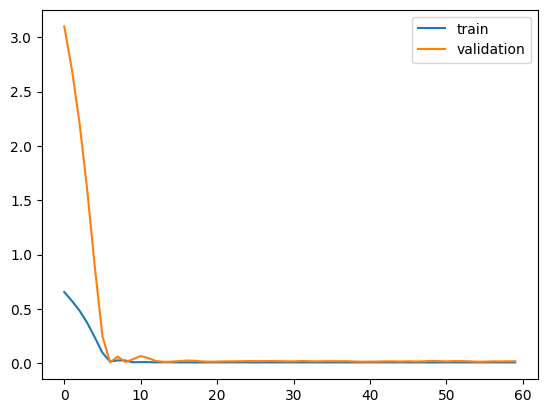

In [15]:

plt.plot(finbert_LSTM_history.history['loss'], label='train')
plt.plot(finbert_LSTM_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

3/3 [==============================] - 2s 23ms/step
MSE:  19.984894804240806
MAE:  4.020091368551051
R2:  -0.5656317043031445


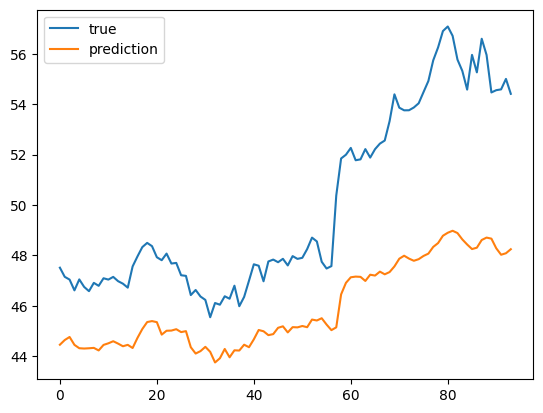

In [16]:
y_pred_finbert_LSTM = finbert_LSTM_model.predict(X_finbert_test)
y_pred_finbert_LSTM = sc_y.inverse_transform(y_pred_finbert_LSTM)



print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_LSTM))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_LSTM))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_LSTM))
# print("AUC: ", accuracy_score(average(y_test_raw), average(y_pred_finbert_LSTM)))



plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_LSTM, label='prediction')
plt.legend()
plt.show()

# RNN Model #

In [17]:
def train_model_rnn(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(layers.SimpleRNN(250, 
                          activation='tanh',
                          # kernal_initializer=tf.keras.initializers.GlorotNormal(),
                           input_shape=(X_train.shape[1], 1), return_sequences=True))
                        # input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.SimpleRNN(200, return_sequences=True,activation='tanh'))
    model.add(layers.Dropout(0.2))
    model.add(layers.SimpleRNN(150, return_sequences=True,activation='tanh'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history

In [18]:
adam_RNN = keras.optimizers.Adam(learning_rate=0.0001)
finbert_RNN_model, finbert_RNN_history = train_model_rnn(X_finbert_train, y_train,'mse', adam_RNN, 60, 128)


Epoch 1/60
6/6 [==============================] - 4s 199ms/step - loss: 0.5230 - val_loss: 0.3103
Epoch 2/60
6/6 [==============================] - 0s 57ms/step - loss: 0.4478 - val_loss: 0.8043
Epoch 3/60
6/6 [==============================] - 0s 53ms/step - loss: 0.2596 - val_loss: 0.0927
Epoch 4/60
6/6 [==============================] - 0s 82ms/step - loss: 0.2855 - val_loss: 0.0533
Epoch 5/60
6/6 [==============================] - 0s 80ms/step - loss: 0.2430 - val_loss: 0.1549
Epoch 6/60
6/6 [==============================] - 0s 65ms/step - loss: 0.1983 - val_loss: 0.0417
Epoch 7/60
6/6 [==============================] - 0s 76ms/step - loss: 0.1871 - val_loss: 0.0343
Epoch 8/60
6/6 [==============================] - 1s 83ms/step - loss: 0.2114 - val_loss: 0.0406
Epoch 9/60
6/6 [==============================] - 0s 76ms/step - loss: 0.2046 - val_loss: 0.0391
Epoch 10/60
6/6 [==============================] - 0s 65ms/step - loss: 0.1871 - val_loss: 0.0569
Epoch 11/60
6/6 [===========

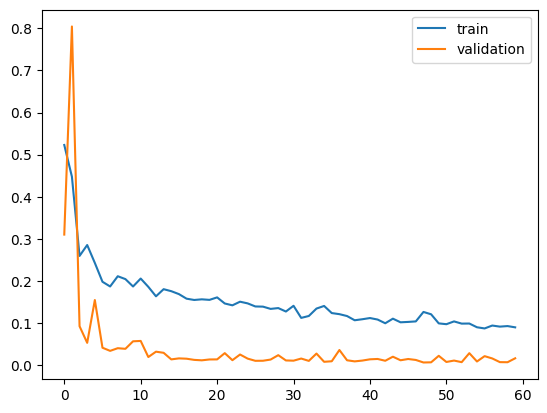

In [19]:
plt.plot(finbert_RNN_history.history['loss'], label='train')
plt.plot(finbert_RNN_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

3/3 [==============================] - 0s 15ms/step
MSE:  14.303625487769953
MAE:  3.2747497632225517
R2:  -0.12055678898940725


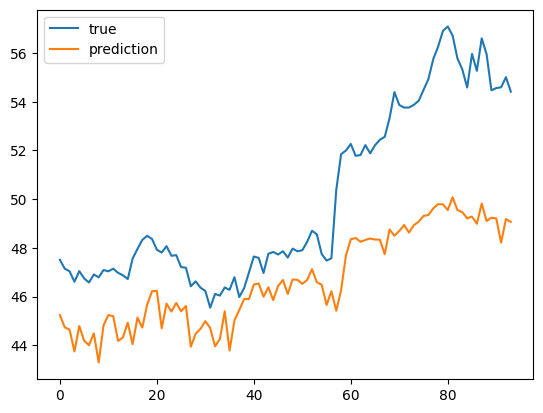

In [20]:
y_pred_finbert_RNN = finbert_RNN_model.predict(X_finbert_test)
y_pred_finbert_RNN = sc_y.inverse_transform(y_pred_finbert_RNN)



print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_RNN))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_RNN))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_RNN))

plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_RNN, label='prediction')
plt.legend()
plt.show()

# GRU Model #

In [21]:
def train_model_gru(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(GRU(250, 
                          activation='tanh',
                          input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(GRU(200, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(150, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False,)
    return model, history

In [22]:
adam_GRU = keras.optimizers.Adam(learning_rate=0.0001)
finbert_GRU_model, finbert_GRU_history = train_model_gru(X_finbert_train, y_train,'mse', adam_GRU, 60, 128)



Epoch 1/60
6/6 [==============================] - 8s 318ms/step - loss: 0.6198 - val_loss: 2.7077
Epoch 2/60
6/6 [==============================] - 1s 105ms/step - loss: 0.4692 - val_loss: 2.0027
Epoch 3/60
6/6 [==============================] - 0s 77ms/step - loss: 0.3378 - val_loss: 1.3138
Epoch 4/60
6/6 [==============================] - 0s 77ms/step - loss: 0.2128 - val_loss: 0.6762
Epoch 5/60
6/6 [==============================] - 0s 74ms/step - loss: 0.1187 - val_loss: 0.1992
Epoch 6/60
6/6 [==============================] - 0s 74ms/step - loss: 0.0782 - val_loss: 0.0316
Epoch 7/60
6/6 [==============================] - 0s 81ms/step - loss: 0.0970 - val_loss: 0.0627
Epoch 8/60
6/6 [==============================] - 0s 85ms/step - loss: 0.1026 - val_loss: 0.0401
Epoch 9/60
6/6 [==============================] - 0s 81ms/step - loss: 0.0890 - val_loss: 0.0333
Epoch 10/60
6/6 [==============================] - 0s 77ms/step - loss: 0.0796 - val_loss: 0.0476
Epoch 11/60
6/6 [==========

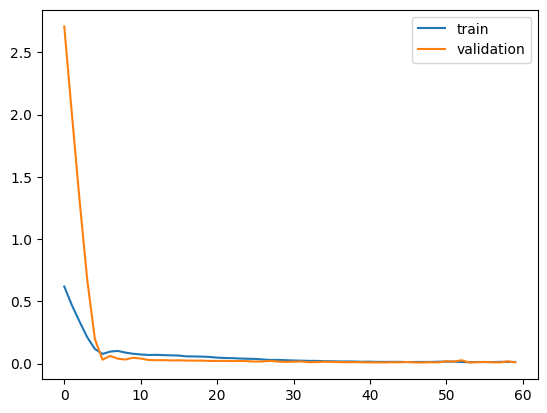

In [23]:
plt.plot(finbert_GRU_history.history['loss'], label='train')
plt.plot(finbert_GRU_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

3/3 [==============================] - 1s 19ms/step
MSE:  5.572483803382483
MAE:  1.9053218069341136
R2:  0.5634474236792055


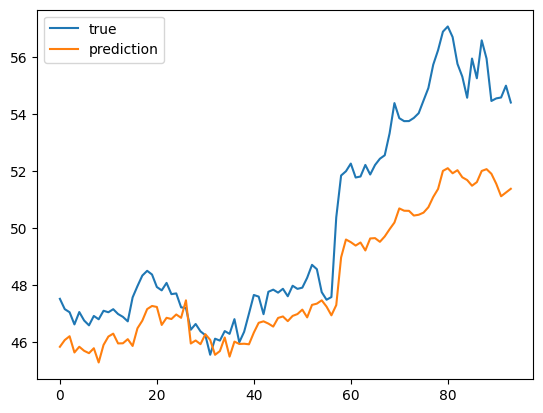

In [24]:
y_pred_finbert_GRU = finbert_GRU_model.predict(X_finbert_test)
y_pred_finbert_GRU = sc_y.inverse_transform(y_pred_finbert_GRU)



print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_GRU))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_GRU))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_GRU))
# print("AUC: ", accuracy_score(y_test_raw, y_pred_finbert_GRU))
plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_GRU, label='prediction')
plt.legend()
plt.show()

# MLP Model #

In [25]:
def train_model_mlp(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(Dense(250, 
                          activation='relu',
                          input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history


In [26]:

adam_MLP = keras.optimizers.Adam(learning_rate=0.0001)
finbert_MLP_model, finbert_MLP_history = train_model_mlp(X_finbert_train, y_train,'mse', adam_MLP, 60, 32)


Epoch 1/60
21/21 [==============================] - 1s 18ms/step - loss: 0.6837 - val_loss: 3.3382
Epoch 2/60
21/21 [==============================] - 0s 7ms/step - loss: 0.5481 - val_loss: 3.0270
Epoch 3/60
21/21 [==============================] - 0s 8ms/step - loss: 0.4380 - val_loss: 2.6609
Epoch 4/60
21/21 [==============================] - 0s 10ms/step - loss: 0.3168 - val_loss: 2.2122
Epoch 5/60
21/21 [==============================] - 0s 10ms/step - loss: 0.2048 - val_loss: 1.6480
Epoch 6/60
21/21 [==============================] - 0s 11ms/step - loss: 0.1255 - val_loss: 1.0461
Epoch 7/60
21/21 [==============================] - 0s 11ms/step - loss: 0.0627 - val_loss: 0.5368
Epoch 8/60
21/21 [==============================] - 0s 11ms/step - loss: 0.0369 - val_loss: 0.2307
Epoch 9/60
21/21 [==============================] - 0s 11ms/step - loss: 0.0298 - val_loss: 0.1042
Epoch 10/60
21/21 [==============================] - 0s 11ms/step - loss: 0.0268 - val_loss: 0.0674
Epoch 11/60

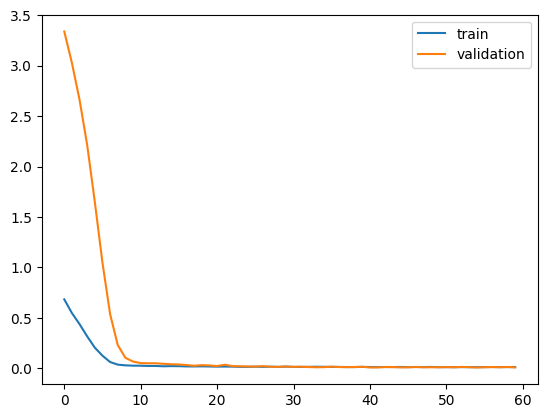

In [27]:

plt.plot(finbert_MLP_history.history['loss'], label='train')
plt.plot(finbert_MLP_history.history['val_loss'], label='validation')
plt.legend()

In [28]:

y_pred_finbert_MLP = finbert_MLP_model.predict(X_finbert_test)
y_pred_finbert_MLP = sc_y.inverse_transform(y_pred_finbert_MLP)



3/3 [==============================] - 0s 8ms/step


MSE:  0.9017406102521268
MAE:  0.7671172954828797
R2:  0.929356961730476


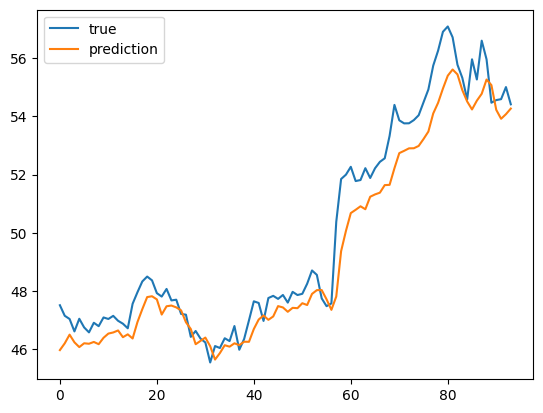

In [29]:

print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_MLP))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_MLP))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_MLP))


plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_MLP, label='prediction')
plt.legend()
plt.show()



## Attention Model ##

In [25]:
X_train.shape

(747, 15)

In [37]:
def train_model_attention(X_train, y_train, loss, optimizer, epochs, batch_size):
    timesteps = 20
    # input shape = (alltime, features)
    X_train_att = np.zeros((X_train.shape[0]-timesteps+1, timesteps, X_train.shape[1]))

    for i in range(X_train.shape[0]-timesteps+1):
        X_train_att[i] = X_train[i:i+timesteps]

    y_train_att = y_train[timesteps-1:]


    model = keras.Sequential()
    model.add(Attention())
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train_att, y_train_att, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history

In [38]:

adam_attention = keras.optimizers.Adam(learning_rate=0.0001)
finbert_MLP_model, finbert_MLP_history = train_model_attention(X_finbert_train, y_train,'mse', adam_attention, 60, 32)


Epoch 1/60


ValueError: in user code:

    File "c:\Users\10536\.conda\envs\MT-NILM\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\10536\.conda\envs\MT-NILM\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\10536\.conda\envs\MT-NILM\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\10536\.conda\envs\MT-NILM\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\10536\.conda\envs\MT-NILM\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\10536\.conda\envs\MT-NILM\lib\site-packages\keras\src\layers\attention\base_dense_attention.py", line 218, in _validate_call_args
        raise ValueError(

    ValueError: Exception encountered when calling layer 'attention_6' (type Attention).
    
    Attention layer must be called on a list of inputs, namely [query, value] or [query, value, key]. Received: Tensor("IteratorGetNext:0", shape=(None, 20, 13), dtype=float32).
    
    Call arguments received by layer 'attention_6' (type Attention):
      • inputs=tf.Tensor(shape=(None, 20, 13), dtype=float32)
      • mask=None
      • training=True
      • return_attention_scores=False
      • use_causal_mask=False


In [ ]:

plt.plot(finbert_MLP_history.history['loss'], label='train')
plt.plot(finbert_MLP_history.history['val_loss'], label='validation')
plt.legend()

In [ ]:

y_pred_finbert_MLP = finbert_MLP_model.predict(X_finbert_test)
y_pred_finbert_MLP = sc_y.inverse_transform(y_pred_finbert_MLP)



In [ ]:

print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_MLP))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_MLP))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_MLP))


plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_MLP, label='prediction')
plt.legend()
plt.show()



# Compare #

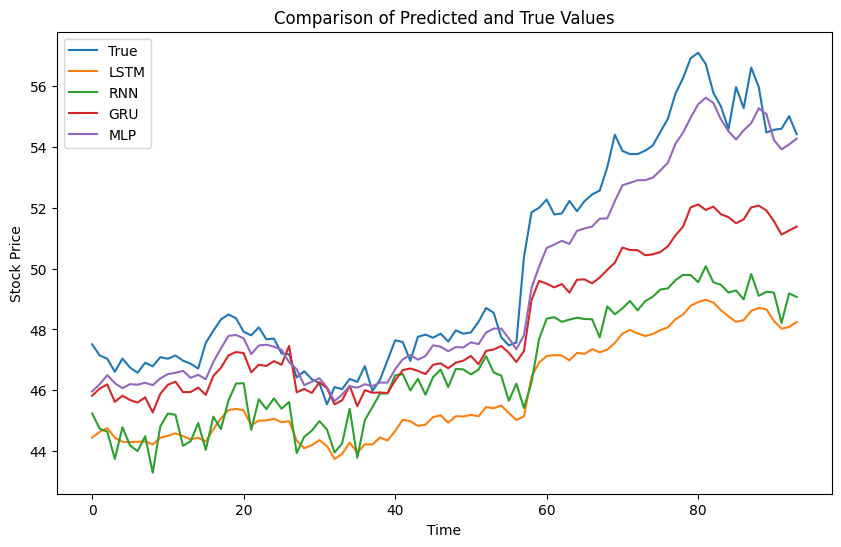

In [30]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))
# plt.figure(dpi=0)
# Plot true values
plt.plot(y_test_raw, label='True')

# Plot predicted values for each model
plt.plot(y_pred_finbert_LSTM, label='LSTM')
plt.plot(y_pred_finbert_RNN, label='RNN')
plt.plot(y_pred_finbert_GRU, label='GRU')
plt.plot(y_pred_finbert_MLP, label='MLP')

# Add title and axis labels
plt.title('Comparison of Predicted and True Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Add legend and show plot
plt.legend()
plt.show()


In [31]:
models = ['LSTM', 'RNN', 'GRU', 'MLP']
preds = [y_pred_finbert_LSTM, y_pred_finbert_RNN,  y_pred_finbert_GRU, y_pred_finbert_MLP]

mae = []
mse = []
r2 = []

In [32]:
from sklearn.metrics import mean_absolute_error
for x in range(0,len(models)):
    mae.append(mean_absolute_error(y_test_raw,preds[x]))
    mse.append(mean_squared_error(y_test_raw,preds[x]))
    r2.append(r2_score(y_test_raw,preds[x]))


In [33]:
df = pd.DataFrame(list(zip(models, mae, mse, r2)),
               columns =['Model', 'Mean Absolute Error', 'Mean Squared Error', 'R2'])

df

,Model,Mean Absolute Error,Mean Squared Error,R2
0,LSTM,4.020091,19.984895,-0.565632
1,RNN,3.274750,14.303625,-0.120557
2,GRU,1.905322,5.572484,0.563447
3,MLP,0.767117,0.901741,0.929357


In [34]:
df["Mean Absolute Error"]

0    4.020091
1    3.274750
2    1.905322
3    0.767117
Name: Mean Absolute Error, dtype: float64

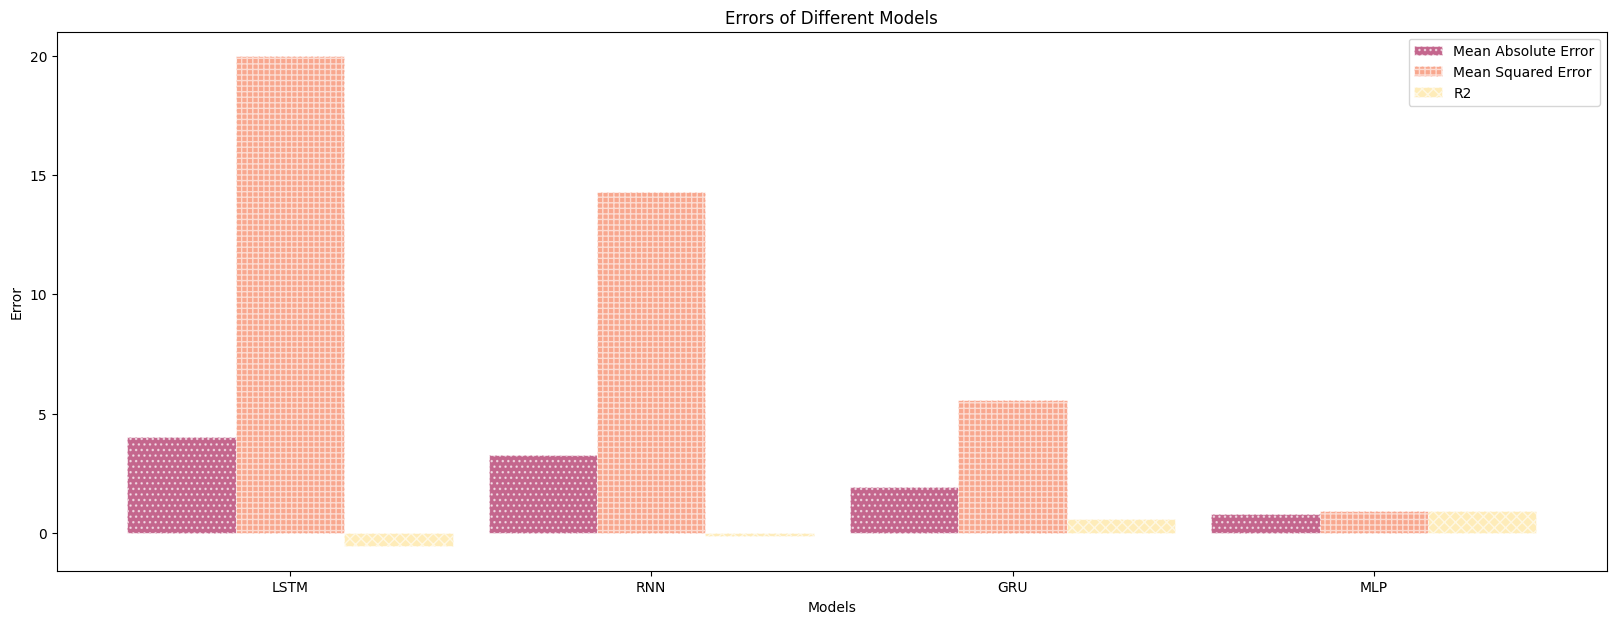

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (20, 7))
x = np.arange(4)
y1 = np.array(df['Mean Absolute Error'])
y2 = np.array(df['Mean Squared Error'])
y3 = np.array(df['R2'])
bar_width = 0.3

colors = [plt.cm.Spectral(i/float(5)) for i in range(5)]

plt.bar(x, y1, width=bar_width, color = colors[0], edgecolor = 'white',capsize=3, lw=.8, hatch='...',alpha=.6,linestyle='--')
plt.bar(x + bar_width, y2, tick_label =  df['Model'], width=bar_width, color = colors[1],edgecolor = 'white',capsize=3, lw=.8, hatch='+++',alpha=.6,linestyle='--')
plt.bar(x + 2 * bar_width, y3, width=bar_width,color = colors[2],edgecolor = 'white',capsize=3, lw=.8, hatch='xxx',alpha=.6,linestyle='--')
plt.xlabel("Models")
plt.ylabel("Error")
plt.title("Errors of Different Models")
plt.legend(["Mean Absolute Error", "Mean Squared Error", "R2"])
plt.show()

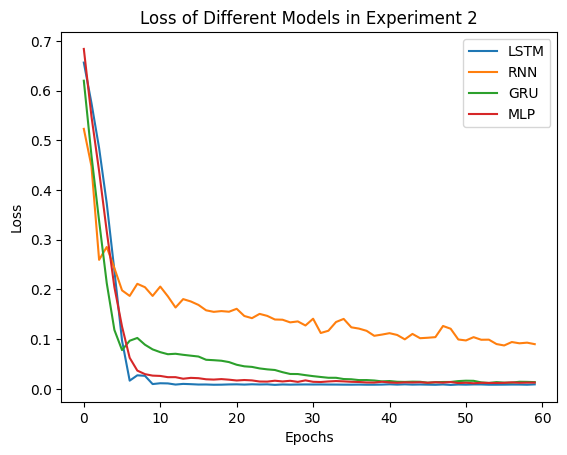

In [36]:
#把所有的loss画在一起
plt.plot(finbert_LSTM_history.history['loss'], label='LSTM')
plt.plot(finbert_RNN_history.history['loss'], label='RNN')

plt.plot(finbert_GRU_history.history['loss'], label='GRU')

plt.plot(finbert_MLP_history.history['loss'], label='MLP')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of Different Models in Experiment 2")
plt.legend()
plt.show()

In [37]:
pickle.dump(finbert_LSTM_model, open(dir+"\\..\\models\\finbert_LSTM_model.pkl", "wb"))
pickle.dump(finbert_RNN_model, open(dir+"\\..\\models\\finbert_RNN_model.pkl", "wb"))
pickle.dump(finbert_GRU_model, open(dir+"\\..\\models\\finbert_GRU_model.pkl", "wb"))
pickle.dump(finbert_MLP_model, open(dir+"\\..\\models\\finbert_MLP_model.pkl", "wb"))
